In [190]:
import tensorflow as tf
from __future__ import print_function
from tensorflow.examples.tutorials.mnist import input_data
import os
import matplotlib.pyplot as plt
from scipy import misc
import scipy
import random
import numpy as np

In [6]:
my_path = "practice_images/"
my_files = []

for (dirpath, dirnames, filenames) in os.walk(my_path):
    my_files.extend(filenames)
    break

my_files = ["image1.png"]
my_tensor_files = tf.convert_to_tensor(my_files)
file_reader = tf.WholeFileReader()
my_tensor_queue = tf.train.string_input_producer(my_tensor_files)

#read one file
key, image_file = file_reader.read(my_tensor_queue)
tensor_image = tf.image.decode_png(image_file)




In [216]:
class input_structure(object):
    
    def __init__(self, source_path, image_path):
        self.source_path = source_path
        self.source_image = misc.imread(source_path)
        self.image_path = image_path
        self.image = misc.imread(image_path)
        
    def get_label(self):
        if self.source_path == self.image_path:
            return one_hot(0, 2)
        else:
            return one_hot(1, 2)
        
            
    def get_input_vector(self):
        return np.vstack([misc.imresize(self.source_image, (60,100)) ,
                          misc.imresize(generate_cut(self.image), (60,100))])
    
# paths = ["sources/", "not_sources/"]
# A = input_structure(paths[0] + "image9.jpg", paths[0] + "image9.jpg")
# print(A.get_label())
# print(A.get_input_vector())
    

        
        

In [140]:
def limit(a, b):
    if a < b:
        return a
    else: return b
    
def generate_cut(image_matrix):
    x,y = image_matrix.shape[:2]
    x_start = random.randint(0, int(x/2))
    y_start = random.randint(0, int(y/2))
    x_end = limit(x_start + int(x/2) + random.randint(0, int(x/16)), x)
    y_end = limit(y_start + int(y/2) + random.randint(0, int(y/16)), y)
    image_cut = image_matrix[x_start:x_end, y_start:y_end]
    return image_cut

def one_hot(x, len_ls):
    a = np.zeros(len_ls, 'uint8')
    a[x] = 1
    return a

# def gen_file_dict(my_files):
#     my_labels = {}
#     file_num = 0
#     for file in my_files:
#         my_labels[file] = one_hot(file_num, len(my_files))
#         file_num = file_num + 1
#     return my_labels

C:\Users\pgarciagonzalez\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """
C:\Users\pgarciagonzalez\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  import sys
C:\Users\pgarciagonzalez\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
C:\Users\pgarciagonzalez\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and

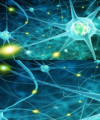

In [222]:
my_paths = ["sources/", "not_sources/"]
my_files_paths = []
image_tuples = []
#mode="L"

for path in my_paths:
    for (dirpath, dirnames, filenames) in os.walk(path):
        my_files_paths.extend([ path + file for file in filenames])
        break

for file_path in my_files_paths:
    
    for i in range(500):
        new_structure = input_structure(file_path, file_path)
        image_tuples.append((new_structure.get_input_vector(), new_structure.get_label()))
    break
    
    for j in range(500)
        
misc.toimage(image_tuples[9][0])

C:\Users\pgarciagonzalez\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  """Entry point for launching an IPython kernel.


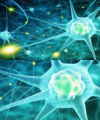

In [225]:
misc.toimage(image_tuples[456][0])

In [201]:
A = image_tuples[1][0]
B = image_tuples[3][0]
C = np.vstack([A, B])
type(C)

numpy.ndarray

In [185]:
num_batches = 50
def create_input(images, num_batches, mode):
    ran_image_tuples = [(a.ravel()/255, np.asarray(b, dtype="float32")) for a,b in images]
    ran_image_lists = list(map(list, zip(*ran_image_tuples)))
    if mode == "train":
        input_batches_list = np.array_split(np.vstack(ran_image_lists[0]), num_batches)
        label_batches_list = np.array_split(np.vstack(ran_image_lists[1]), num_batches)
    elif mode == "test":
        input_batches_list = np.vstack(ran_image_lists[0])
        label_batches_list = np.vstack(ran_image_lists[1])
    else:
        print("te estas inventando el modo o se te ha olvidado")
        return
    return input_batches_list, label_batches_list

random.shuffle(image_tuples)
threshold = int(len(image_tuples)*0.8)
train_image_tuples = image_tuples[0:threshold]
test_image_tuples = image_tuples[threshold:]
X_train, Y_train = create_input(train_image_tuples, num_batches, mode="train")
X_test, Y_test = create_input(test_image_tuples, num_batches, mode="test")


In [186]:
x_im = 60
y_im = 100
pixel_im = 3
output_dim = 8

x = tf.placeholder(tf.float32, [None, x_im*y_im*pixel_im])
W = tf.Variable(tf.zeros([x_im*y_im*pixel_im, output_dim]))
b = tf.Variable(tf.zeros([output_dim]))

y = tf.nn.softmax(tf.matmul(x, W) + b)

y_actual = tf.placeholder(tf.float32, [None, output_dim])

cross_entropy = tf.reduce_mean(
              tf.nn.softmax_cross_entropy_with_logits(labels=y_actual, logits=y))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

sess = tf.InteractiveSession()

tf.global_variables_initializer().run()

for j in range(40):
    for i in range(num_batches):
        batch_xs, batch_ys = X_train[i], Y_train[i]
        sess.run(train_step, feed_dict={x: batch_xs, y_actual: batch_ys})



In [189]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_actual,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

print(sess.run(accuracy, feed_dict={x: X_test, y_actual: Y_test}))
print(sess.run(x, feed_dict={x: X_test, y_actual: Y_test}))

0.855625


AttributeError: 'Tensor' object has no attribute 'std'

In [ ]:
#convolutional network
[0 0 1], [0 1 0]
2, 1
2 == 1



In [148]:
len(test_image_tuples)

40

In [175]:
pos = 234
A = misc.toimage((X_test[pos]*255).reshape(60, 100, 3))
A.show(), Y_test[pos], labels["image7.jpg"]

C:\Users\pgarciagonzalez\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  


(None,
 array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.], dtype=float32),
 array([0, 0, 0, 0, 0, 1, 0, 0], dtype=uint8))

In [87]:
A = [(a.ravel(), np.asarray(b, dtype="float32")) for a,b in image_tuples]
B = list(map(list, zip(*A)))

In [161]:
Y_test[0], labels[]

array([ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.], dtype=float32)

In [164]:
X_test[0]

array([ 0.24705882,  0.36078431,  0.49411765, ...,  0.34117647,
        0.41176471,  0.49411765])

C:\Users\pgarciagonzalez\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  """Entry point for launching an IPython kernel.


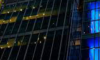

In [183]:
misc.toimage(image_tuples[2567][0])